# Glauber with periodic time on a tree

In [1]:
# import Pkg; Pkg.develop(path="../../.julia/dev/BeliefPropagation/");

In [2]:
using MatrixProductBP, MatrixProductBP.Models
using Plots, Graphs, Statistics
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear)
using LaTeXStrings
using Graphs, IndexedGraphs, Random
import BeliefPropagation;

In [3]:
T = 50
J = 0.8
β = 1.0
h = 0.2
m⁰ = 0.5
rng = MersenneTwister(0)
N = 6
g = prufer_decode(rand(rng, 1:N, N-2)) |> IndexedGraph
ising = Ising(J * adjacency_matrix(g), h*ones(nv(g)), β)
gl = Glauber(ising, T)
ϕᵢ = [ t == 0 ? [(1+m⁰)/2, (1-m⁰)/2] : ones(2) for t in 0:T]
bp = periodic_mpbp(gl)
cb = CB_BP(bp);

In [4]:
bp_static = BeliefPropagation.BP(BeliefPropagation.Models.Ising(J * adjacency_matrix(g), h*ones(nv(g)), β))
BeliefPropagation.iterate!(bp_static; maxiter=100)
m_static = reduce.(-, BeliefPropagation.beliefs(bp_static)) |> mean

0.5658482745848965

In [5]:
svd_trunc=TruncBondThresh(100, 1e-6)
iters, cb = iterate!(bp; maxiter=100, svd_trunc, cb, tol=1e-5, damp=0.0);

Running MPBP: iter 2    Time: 0:00:26
  Δ:                  0.18345735125167684




Running MPBP: iter 3    Time: 0:00:27
  Δ:                  0.11912286776072323




Running MPBP: iter 4    Time: 0:00:28
  Δ:                  0.030775138051659434




Running MPBP: iter 5    Time: 0:00:28
  Δ:                  0.0


┌ Warning: No strict ticks found
└ @ PlotUtils /home/crotti/.julia/packages/PlotUtils/mHQ0Q/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/crotti/.julia/packages/PlotUtils/mHQ0Q/src/ticks.jl:191


┌ Warning: Invalid negative or zero value 0.0 found at series index 5 for log10 based yscale
└ @ Plots /home/crotti/.julia/packages/Plots/sxUvK/src/utils.jl:106
┌ Warning: No strict ticks found
└ @ PlotUtils /home/crotti/.julia/packages/PlotUtils/mHQ0Q/src/ticks.jl:191


┌ Warning: No strict ticks found
└ @ PlotUtils /home/crotti/.julia/packages/PlotUtils/mHQ0Q/src/ticks.jl:191
┌ Warning: Invalid negative or zero value 0.0 found at series index 5 for log10 based yscale
└ @ Plots /home/crotti/.julia/packages/Plots/sxUvK/src/utils.jl:106


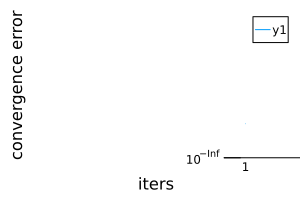

┌ Warning: No strict ticks found
└ @ PlotUtils /home/crotti/.julia/packages/PlotUtils/mHQ0Q/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/crotti/.julia/packages/PlotUtils/mHQ0Q/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/crotti/.julia/packages/PlotUtils/mHQ0Q/src/ticks.jl:191
┌ Warning: Invalid negative or zero value 0.0 found at series index 5 for log10 based yscale
└ @ Plots /home/crotti/.julia/packages/Plots/sxUvK/src/utils.jl:106


In [6]:
plot(cb.Δs, ylabel="convergence error", xlabel="iters", yaxis=:log10, legend=:outertopright,
    size=(300,200))

In [7]:
spin(x, i) = 3-2x
spin(x) = spin(x, 0)
m = mean(means(spin, bp));

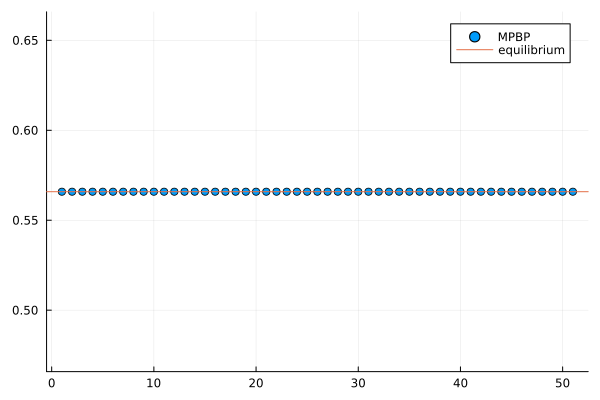

In [8]:
pl = scatter(m, label="MPBP")
hline!(pl, [m_static], label="equilibrium", ylims=m_static .+ 1e-1 .* (-1, 1))

In [9]:
import TensorTrains
TensorTrains.bond_dims.(bp.μ)

10-element Vector{Vector{Int64}}:
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
 [18, 17, 17, 17, 17, 17, 17, 17, 17, 17  …  17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
 [18, 17, 17, 17, 17, 17, 17, 17, 17, 17  …  17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
 [6, 5, 5, 5, 5, 5, 5, 5, 5, 5  …  5, 5, 5, 5, 5, 5, 5, 5, 5, 6]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
 [18, 17, 17, 17, 17, 17, 17, 17, 17, 17  …  17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
 [6, 5, 5, 5, 5, 5, 5, 5, 5, 5  …  5, 5, 5, 5, 5, 5, 5, 5, 5, 6]
 [17, 17, 17, 17, 17, 17, 17, 17, 17, 17  …  17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2]